In [2]:
import pandas as pd

import tensorflow.compat.v2 as tf

import matplotlib.pyplot as plt
import numpy as np

tf.enable_v2_behavior()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Clean original dataset and save clean h5

In [3]:
newfile = []
columns = None
with open('dataset.csv') as f:
    # process first line separately
    for i, line in enumerate(f):
#         print(line)
        newline = [val for val in line.split(' ') if val != '']
        newline[-1] = newline[-1][:-1]
        if i > 0:
            newline = [float(val) for val in newline]
            newfile.append(newline)
        else:
            columns = newline
        # print(newline)

In [4]:
df = pd.DataFrame(newfile, columns=columns)
df.to_hdf('cleaned_dataset.h5', key='df')

## Load dataset

In [5]:
df = pd.read_hdf('cleaned_dataset.h5', key='df')

In [6]:
x = df.loc[:, df.columns != 'MEDV'] # features
y = df.loc[:, df.columns == 'MEDV'] # label

In [7]:
labels = pd.read_csv('data_labels.csv', sep='\n')

## Data exploration

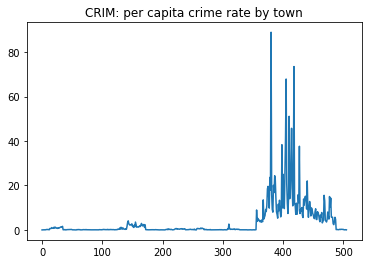

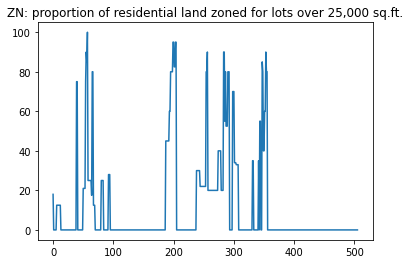

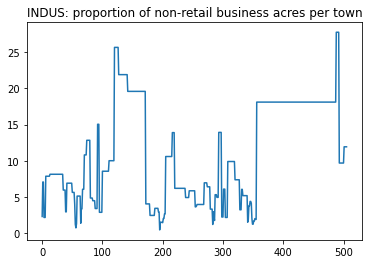

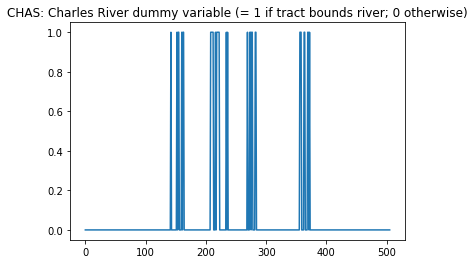

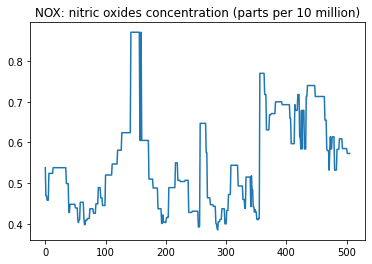

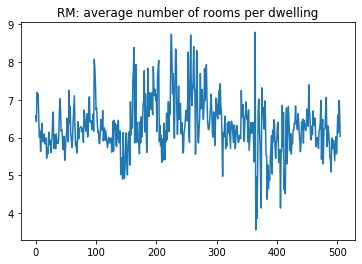

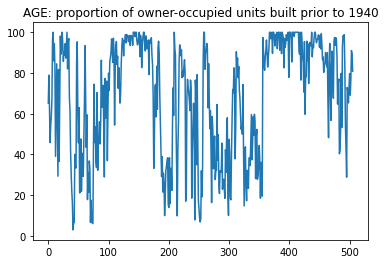

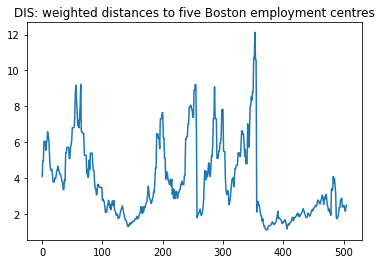

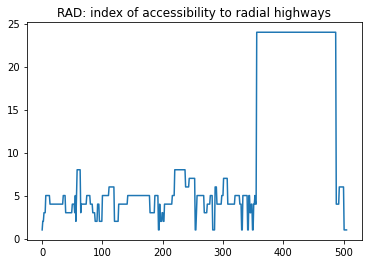

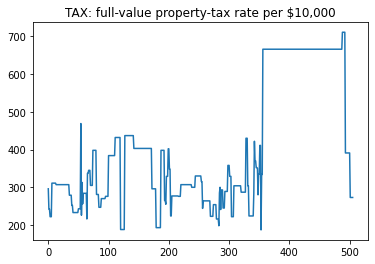

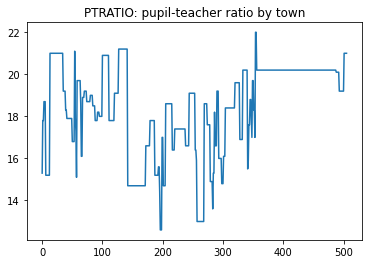

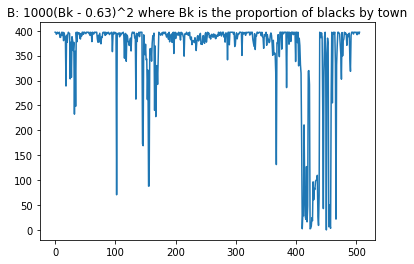

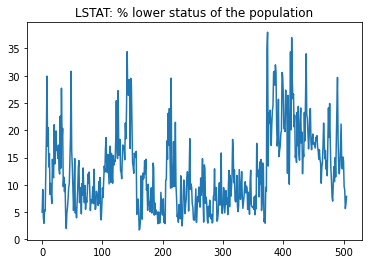

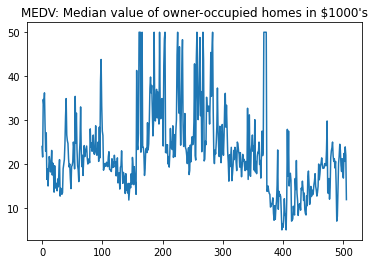

In [8]:
for i, col in enumerate(df):
#     print(col)
    plt.figure()
    plt.plot(df[col])
    plt.title(labels.iloc[i][0])

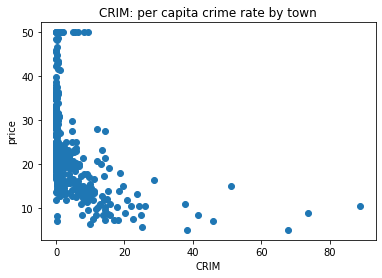

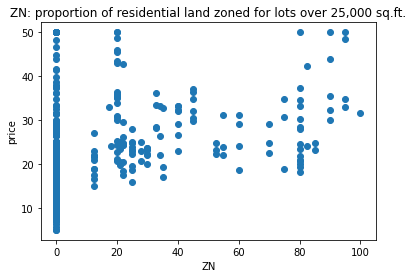

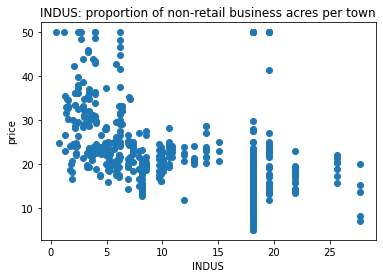

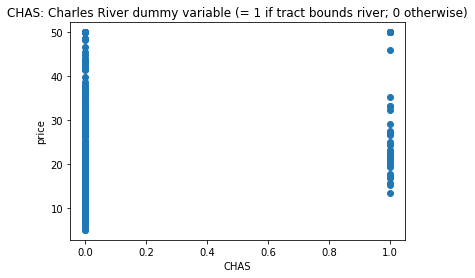

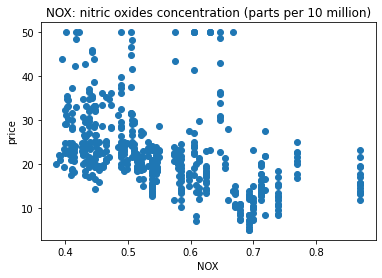

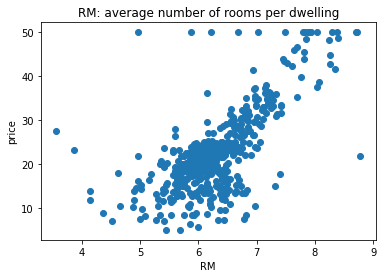

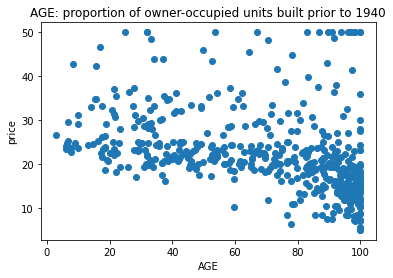

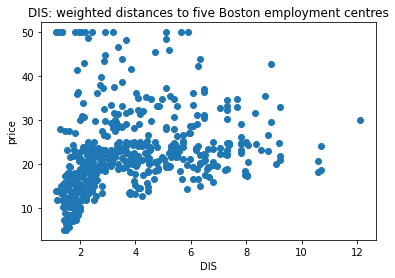

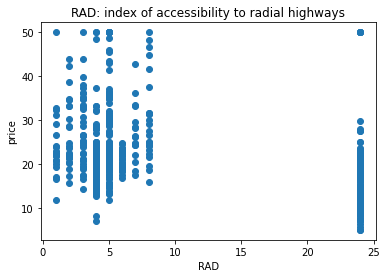

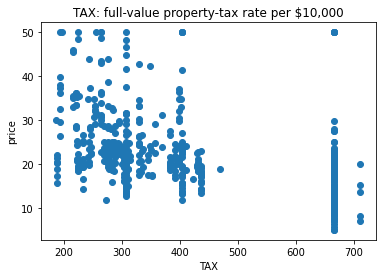

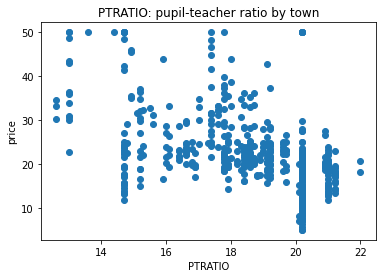

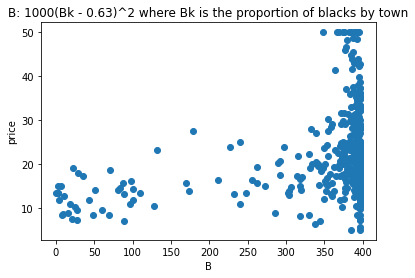

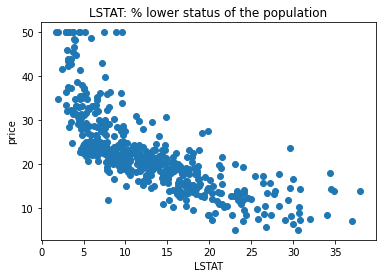

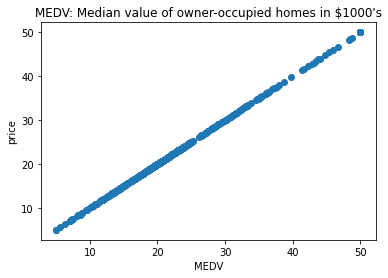

In [9]:
for i, col in enumerate(df):
#     print(col)
    plt.figure()
    plt.scatter(df[col],df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(labels.iloc[i][0])

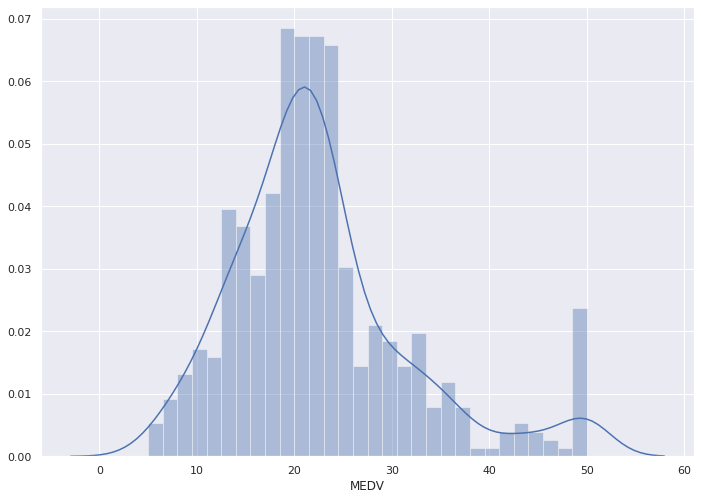

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

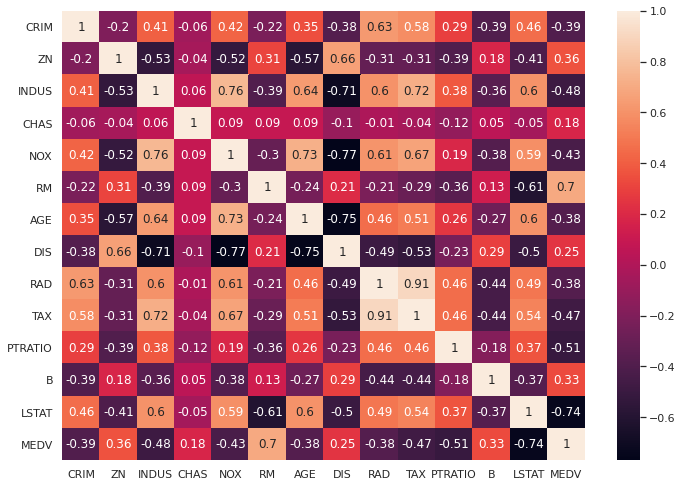

In [11]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

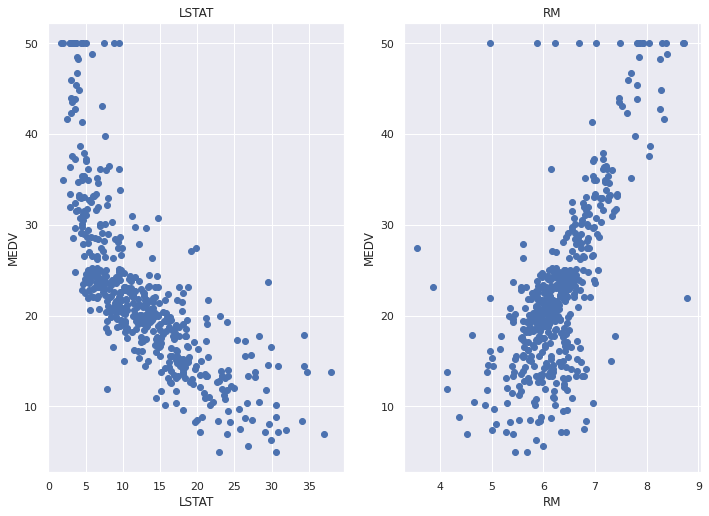

In [12]:
lin_reg_features = ['LSTAT','RM']
for i, col in enumerate(lin_reg_features):
    plt.subplot(1, len(lin_reg_features) , i+1)
    x = df[col]
    y = df['MEDV']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Build train/test dataset

In [13]:
lin_reg_x = df[lin_reg_features]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(lin_reg_x, y, test_size=0.33)

## Build model (linear regression)

In [15]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

## Analyze performance (linear regression)

The model performance for training set is:

In [16]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 5.3315338923602935
R2 score is 0.6823500500299461


The model performance for testing set is:

In [17]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 6.083665920849716
R2 score is 0.5007472934115214


## Build model (decision tree)

follow this [link](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)

## Build model (simple sequential)

In [32]:
input_size = len(lin_reg_features)
output_size = 1

seq_model = tf.keras.models.Sequential()
seq_model.add(tf.keras.layers.Dense(input_size, input_shape=(input_size,), activation='tanh'))
seq_model.add(tf.keras.layers.Dense(100, activation='tanh'))
seq_model.add(tf.keras.layers.Dense(20, activation='tanh'))
seq_model.add(tf.keras.layers.Dense(output_size, activation='linear'))
seq_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['accuracy'],
)
seq_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 2,347
Trainable params: 2,347
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 1000

history_callback = seq_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=num_epochs,
    verbose=1,
    # validation_data=(x_val, y_val),
    validation_split=0.2,
)

Epoch 1/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.1595 - accuracy: 0.0000e+00 - val_loss: 52.4228 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.3354 - accuracy: 0.0000e+00 - val_loss: 52.1787 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.5837 - accuracy: 0.0000e+00 - val_loss: 52.2428 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.2499 - accuracy: 0.0000e+00 - val_loss: 52.5139 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.1233 - accuracy: 0.0000e+00 - val_loss: 52.2809 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.0011 - accuracy: 0.0000e+00 - val_loss: 51.5992 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 49.3504 - accuracy: 0.0000e+

9/9 [==============================] - 0s 3ms/step - loss: 43.3969 - accuracy: 0.0000e+00 - val_loss: 44.8811 - val_accuracy: 0.0000e+00
Epoch 56/1000
9/9 [==============================] - 0s 3ms/step - loss: 43.3686 - accuracy: 0.0000e+00 - val_loss: 44.3923 - val_accuracy: 0.0000e+00
Epoch 57/1000
9/9 [==============================] - 0s 4ms/step - loss: 43.4208 - accuracy: 0.0000e+00 - val_loss: 44.4459 - val_accuracy: 0.0000e+00
Epoch 58/1000
9/9 [==============================] - 0s 3ms/step - loss: 43.4630 - accuracy: 0.0000e+00 - val_loss: 44.7691 - val_accuracy: 0.0000e+00
Epoch 59/1000
9/9 [==============================] - 0s 3ms/step - loss: 43.2364 - accuracy: 0.0000e+00 - val_loss: 44.3003 - val_accuracy: 0.0000e+00
Epoch 60/1000
9/9 [==============================] - 0s 3ms/step - loss: 43.1651 - accuracy: 0.0000e+00 - val_loss: 43.5692 - val_accuracy: 0.0000e+00
Epoch 61/1000
9/9 [==============================] - 0s 3ms/step - loss: 43.2988 - accuracy: 0.0000e+00 - va

9/9 [==============================] - 0s 3ms/step - loss: 37.9598 - accuracy: 0.0000e+00 - val_loss: 39.6597 - val_accuracy: 0.0000e+00
Epoch 110/1000
9/9 [==============================] - 0s 3ms/step - loss: 38.0184 - accuracy: 0.0000e+00 - val_loss: 38.7108 - val_accuracy: 0.0000e+00
Epoch 111/1000
9/9 [==============================] - 0s 3ms/step - loss: 37.9622 - accuracy: 0.0000e+00 - val_loss: 38.5613 - val_accuracy: 0.0000e+00
Epoch 112/1000
9/9 [==============================] - 0s 3ms/step - loss: 37.7680 - accuracy: 0.0000e+00 - val_loss: 38.6863 - val_accuracy: 0.0000e+00
Epoch 113/1000
9/9 [==============================] - 0s 3ms/step - loss: 37.6571 - accuracy: 0.0000e+00 - val_loss: 38.2674 - val_accuracy: 0.0000e+00
Epoch 114/1000
9/9 [==============================] - 0s 3ms/step - loss: 37.5784 - accuracy: 0.0000e+00 - val_loss: 39.0919 - val_accuracy: 0.0000e+00
Epoch 115/1000
9/9 [==============================] - 0s 3ms/step - loss: 37.6964 - accuracy: 0.0000e+0

Epoch 163/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.7520 - accuracy: 0.0000e+00 - val_loss: 36.7398 - val_accuracy: 0.0000e+00
Epoch 164/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.9221 - accuracy: 0.0000e+00 - val_loss: 36.5273 - val_accuracy: 0.0000e+00
Epoch 165/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.8325 - accuracy: 0.0000e+00 - val_loss: 36.1521 - val_accuracy: 0.0000e+00
Epoch 166/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.6401 - accuracy: 0.0000e+00 - val_loss: 36.1755 - val_accuracy: 0.0000e+00
Epoch 167/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.6027 - accuracy: 0.0000e+00 - val_loss: 35.7926 - val_accuracy: 0.0000e+00
Epoch 168/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.7279 - accuracy: 0.0000e+00 - val_loss: 35.7112 - val_accuracy: 0.0000e+00
Epoch 169/1000
9/9 [==============================] - 0s 3ms/step - loss: 34.5917 - accu

Epoch 217/1000
9/9 [==============================] - 0s 3ms/step - loss: 31.5533 - accuracy: 0.0000e+00 - val_loss: 33.2989 - val_accuracy: 0.0000e+00
Epoch 218/1000
9/9 [==============================] - 0s 4ms/step - loss: 31.5135 - accuracy: 0.0000e+00 - val_loss: 33.4206 - val_accuracy: 0.0000e+00
Epoch 219/1000
9/9 [==============================] - 0s 3ms/step - loss: 31.4800 - accuracy: 0.0000e+00 - val_loss: 32.4001 - val_accuracy: 0.0000e+00
Epoch 220/1000
9/9 [==============================] - 0s 3ms/step - loss: 31.4941 - accuracy: 0.0000e+00 - val_loss: 33.1913 - val_accuracy: 0.0000e+00
Epoch 221/1000
9/9 [==============================] - 0s 3ms/step - loss: 31.4137 - accuracy: 0.0000e+00 - val_loss: 32.5021 - val_accuracy: 0.0000e+00
Epoch 222/1000
9/9 [==============================] - 0s 3ms/step - loss: 31.4154 - accuracy: 0.0000e+00 - val_loss: 33.0319 - val_accuracy: 0.0000e+00
Epoch 223/1000
9/9 [==============================] - 0s 3ms/step - loss: 31.5624 - accu

Epoch 271/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.6038 - accuracy: 0.0000e+00 - val_loss: 31.1314 - val_accuracy: 0.0000e+00
Epoch 272/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.5348 - accuracy: 0.0000e+00 - val_loss: 32.4848 - val_accuracy: 0.0000e+00
Epoch 273/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.4667 - accuracy: 0.0000e+00 - val_loss: 31.3101 - val_accuracy: 0.0000e+00
Epoch 274/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.5618 - accuracy: 0.0000e+00 - val_loss: 31.3971 - val_accuracy: 0.0000e+00
Epoch 275/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.3897 - accuracy: 0.0000e+00 - val_loss: 31.3500 - val_accuracy: 0.0000e+00
Epoch 276/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.4752 - accuracy: 0.0000e+00 - val_loss: 32.4246 - val_accuracy: 0.0000e+00
Epoch 277/1000
9/9 [==============================] - 0s 3ms/step - loss: 30.6643 - accu

Epoch 325/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.9597 - accuracy: 0.0000e+00 - val_loss: 31.5002 - val_accuracy: 0.0000e+00
Epoch 326/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.6355 - accuracy: 0.0000e+00 - val_loss: 30.2032 - val_accuracy: 0.0000e+00
Epoch 327/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.9825 - accuracy: 0.0000e+00 - val_loss: 31.9508 - val_accuracy: 0.0000e+00
Epoch 328/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.7947 - accuracy: 0.0000e+00 - val_loss: 30.4422 - val_accuracy: 0.0000e+00
Epoch 329/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.7872 - accuracy: 0.0000e+00 - val_loss: 31.0315 - val_accuracy: 0.0000e+00
Epoch 330/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.7890 - accuracy: 0.0000e+00 - val_loss: 30.3647 - val_accuracy: 0.0000e+00
Epoch 331/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.7537 - accu

Epoch 379/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.2094 - accuracy: 0.0000e+00 - val_loss: 30.1566 - val_accuracy: 0.0000e+00
Epoch 380/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.5096 - accuracy: 0.0000e+00 - val_loss: 30.0576 - val_accuracy: 0.0000e+00
Epoch 381/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.1856 - accuracy: 0.0000e+00 - val_loss: 30.6437 - val_accuracy: 0.0000e+00
Epoch 382/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.3201 - accuracy: 0.0000e+00 - val_loss: 30.5748 - val_accuracy: 0.0000e+00
Epoch 383/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.5824 - accuracy: 0.0000e+00 - val_loss: 29.9429 - val_accuracy: 0.0000e+00
Epoch 384/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.5895 - accuracy: 0.0000e+00 - val_loss: 31.3187 - val_accuracy: 0.0000e+00
Epoch 385/1000
9/9 [==============================] - 0s 3ms/step - loss: 29.2817 - accu

Epoch 433/1000
9/9 [==============================] - 0s 3ms/step - loss: 28.2890 - accuracy: 0.0000e+00 - val_loss: 29.0088 - val_accuracy: 0.0000e+00
Epoch 434/1000
9/9 [==============================] - 0s 3ms/step - loss: 28.1990 - accuracy: 0.0000e+00 - val_loss: 28.5682 - val_accuracy: 0.0000e+00
Epoch 435/1000
9/9 [==============================] - 0s 3ms/step - loss: 28.0792 - accuracy: 0.0000e+00 - val_loss: 28.7035 - val_accuracy: 0.0000e+00
Epoch 436/1000
9/9 [==============================] - 0s 4ms/step - loss: 28.0115 - accuracy: 0.0000e+00 - val_loss: 28.8939 - val_accuracy: 0.0000e+00
Epoch 437/1000
9/9 [==============================] - 0s 3ms/step - loss: 27.9082 - accuracy: 0.0000e+00 - val_loss: 28.6980 - val_accuracy: 0.0000e+00
Epoch 438/1000
9/9 [==============================] - 0s 3ms/step - loss: 27.6908 - accuracy: 0.0000e+00 - val_loss: 28.4108 - val_accuracy: 0.0000e+00
Epoch 439/1000
9/9 [==============================] - 0s 3ms/step - loss: 27.5951 - accu

Epoch 487/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.5228 - accuracy: 0.0000e+00 - val_loss: 25.0482 - val_accuracy: 0.0000e+00
Epoch 488/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.4069 - accuracy: 0.0000e+00 - val_loss: 24.9474 - val_accuracy: 0.0000e+00
Epoch 489/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.4358 - accuracy: 0.0000e+00 - val_loss: 24.7367 - val_accuracy: 0.0000e+00
Epoch 490/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.6443 - accuracy: 0.0000e+00 - val_loss: 25.0352 - val_accuracy: 0.0000e+00
Epoch 491/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.4848 - accuracy: 0.0000e+00 - val_loss: 24.7367 - val_accuracy: 0.0000e+00
Epoch 492/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.4391 - accuracy: 0.0000e+00 - val_loss: 24.8436 - val_accuracy: 0.0000e+00
Epoch 493/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.3137 - accu

Epoch 541/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.1840 - accuracy: 0.0000e+00 - val_loss: 24.0344 - val_accuracy: 0.0000e+00
Epoch 542/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.6764 - accuracy: 0.0000e+00 - val_loss: 24.1740 - val_accuracy: 0.0000e+00
Epoch 543/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.2350 - accuracy: 0.0000e+00 - val_loss: 24.0038 - val_accuracy: 0.0000e+00
Epoch 544/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.4983 - accuracy: 0.0000e+00 - val_loss: 24.5125 - val_accuracy: 0.0000e+00
Epoch 545/1000
9/9 [==============================] - 0s 5ms/step - loss: 25.3675 - accuracy: 0.0000e+00 - val_loss: 23.7408 - val_accuracy: 0.0000e+00
Epoch 546/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.2700 - accuracy: 0.0000e+00 - val_loss: 24.0174 - val_accuracy: 0.0000e+00
Epoch 547/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.2188 - accu

Epoch 595/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.0499 - accuracy: 0.0000e+00 - val_loss: 23.8329 - val_accuracy: 0.0000e+00
Epoch 596/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.1008 - accuracy: 0.0000e+00 - val_loss: 23.6814 - val_accuracy: 0.0000e+00
Epoch 597/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.0330 - accuracy: 0.0000e+00 - val_loss: 23.7428 - val_accuracy: 0.0000e+00
Epoch 598/1000
9/9 [==============================] - 0s 4ms/step - loss: 24.9711 - accuracy: 0.0000e+00 - val_loss: 24.1475 - val_accuracy: 0.0000e+00
Epoch 599/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.1350 - accuracy: 0.0000e+00 - val_loss: 24.3902 - val_accuracy: 0.0000e+00
Epoch 600/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.1425 - accuracy: 0.0000e+00 - val_loss: 23.8493 - val_accuracy: 0.0000e+00
Epoch 601/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.1291 - accu

Epoch 649/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.0098 - accuracy: 0.0000e+00 - val_loss: 23.6151 - val_accuracy: 0.0000e+00
Epoch 650/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9690 - accuracy: 0.0000e+00 - val_loss: 23.5282 - val_accuracy: 0.0000e+00
Epoch 651/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.0461 - accuracy: 0.0000e+00 - val_loss: 23.3672 - val_accuracy: 0.0000e+00
Epoch 652/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.0158 - accuracy: 0.0000e+00 - val_loss: 23.6007 - val_accuracy: 0.0000e+00
Epoch 653/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9271 - accuracy: 0.0000e+00 - val_loss: 23.4736 - val_accuracy: 0.0000e+00
Epoch 654/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.1792 - accuracy: 0.0000e+00 - val_loss: 23.4901 - val_accuracy: 0.0000e+00
Epoch 655/1000
9/9 [==============================] - 0s 4ms/step - loss: 24.9606 - accu

Epoch 703/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.0019 - accuracy: 0.0000e+00 - val_loss: 23.3801 - val_accuracy: 0.0000e+00
Epoch 704/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9460 - accuracy: 0.0000e+00 - val_loss: 23.1039 - val_accuracy: 0.0000e+00
Epoch 705/1000
9/9 [==============================] - 0s 4ms/step - loss: 25.0426 - accuracy: 0.0000e+00 - val_loss: 23.1569 - val_accuracy: 0.0000e+00
Epoch 706/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.0386 - accuracy: 0.0000e+00 - val_loss: 23.8079 - val_accuracy: 0.0000e+00
Epoch 707/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.1102 - accuracy: 0.0000e+00 - val_loss: 23.5324 - val_accuracy: 0.0000e+00
Epoch 708/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9197 - accuracy: 0.0000e+00 - val_loss: 23.1502 - val_accuracy: 0.0000e+00
Epoch 709/1000
9/9 [==============================] - 0s 3ms/step - loss: 25.0114 - accu

Epoch 757/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9939 - accuracy: 0.0000e+00 - val_loss: 22.8500 - val_accuracy: 0.0000e+00
Epoch 758/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9231 - accuracy: 0.0000e+00 - val_loss: 23.1876 - val_accuracy: 0.0000e+00
Epoch 759/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9246 - accuracy: 0.0000e+00 - val_loss: 23.0896 - val_accuracy: 0.0000e+00
Epoch 760/1000
9/9 [==============================] - 0s 4ms/step - loss: 24.8818 - accuracy: 0.0000e+00 - val_loss: 22.7723 - val_accuracy: 0.0000e+00
Epoch 761/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.8765 - accuracy: 0.0000e+00 - val_loss: 23.2147 - val_accuracy: 0.0000e+00
Epoch 762/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.8528 - accuracy: 0.0000e+00 - val_loss: 22.9796 - val_accuracy: 0.0000e+00
Epoch 763/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9312 - accu

Epoch 811/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.7038 - accuracy: 0.0000e+00 - val_loss: 23.3162 - val_accuracy: 0.0000e+00
Epoch 812/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.7773 - accuracy: 0.0000e+00 - val_loss: 23.3045 - val_accuracy: 0.0000e+00
Epoch 813/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.8212 - accuracy: 0.0000e+00 - val_loss: 23.3423 - val_accuracy: 0.0000e+00
Epoch 814/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.8603 - accuracy: 0.0000e+00 - val_loss: 22.5258 - val_accuracy: 0.0000e+00
Epoch 815/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.8612 - accuracy: 0.0000e+00 - val_loss: 22.7277 - val_accuracy: 0.0000e+00
Epoch 816/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.7448 - accuracy: 0.0000e+00 - val_loss: 22.8154 - val_accuracy: 0.0000e+00
Epoch 817/1000
9/9 [==============================] - 0s 4ms/step - loss: 24.6987 - accu

Epoch 865/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.9561 - accuracy: 0.0000e+00 - val_loss: 22.8419 - val_accuracy: 0.0000e+00
Epoch 866/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.6586 - accuracy: 0.0000e+00 - val_loss: 22.9079 - val_accuracy: 0.0000e+00
Epoch 867/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.7608 - accuracy: 0.0000e+00 - val_loss: 22.5458 - val_accuracy: 0.0000e+00
Epoch 868/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.6441 - accuracy: 0.0000e+00 - val_loss: 22.8864 - val_accuracy: 0.0000e+00
Epoch 869/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.6758 - accuracy: 0.0000e+00 - val_loss: 23.1995 - val_accuracy: 0.0000e+00
Epoch 870/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.6075 - accuracy: 0.0000e+00 - val_loss: 23.1963 - val_accuracy: 0.0000e+00
Epoch 871/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.6194 - accu

Epoch 919/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.5267 - accuracy: 0.0000e+00 - val_loss: 22.8119 - val_accuracy: 0.0000e+00
Epoch 920/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.4863 - accuracy: 0.0000e+00 - val_loss: 22.7700 - val_accuracy: 0.0000e+00
Epoch 921/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.5124 - accuracy: 0.0000e+00 - val_loss: 22.6699 - val_accuracy: 0.0000e+00
Epoch 922/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.3918 - accuracy: 0.0000e+00 - val_loss: 22.7261 - val_accuracy: 0.0000e+00
Epoch 923/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.4709 - accuracy: 0.0000e+00 - val_loss: 22.8241 - val_accuracy: 0.0000e+00
Epoch 924/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.4367 - accuracy: 0.0000e+00 - val_loss: 22.4331 - val_accuracy: 0.0000e+00
Epoch 925/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.4725 - accu

Epoch 973/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.2882 - accuracy: 0.0000e+00 - val_loss: 22.2190 - val_accuracy: 0.0000e+00
Epoch 974/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.2318 - accuracy: 0.0000e+00 - val_loss: 21.9519 - val_accuracy: 0.0000e+00
Epoch 975/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.3118 - accuracy: 0.0000e+00 - val_loss: 21.6066 - val_accuracy: 0.0000e+00
Epoch 976/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.4226 - accuracy: 0.0000e+00 - val_loss: 21.7633 - val_accuracy: 0.0000e+00
Epoch 977/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.1392 - accuracy: 0.0000e+00 - val_loss: 22.6761 - val_accuracy: 0.0000e+00
Epoch 978/1000
9/9 [==============================] - 0s 4ms/step - loss: 24.3924 - accuracy: 0.0000e+00 - val_loss: 22.6950 - val_accuracy: 0.0000e+00
Epoch 979/1000
9/9 [==============================] - 0s 3ms/step - loss: 24.3302 - accu

In [39]:
history_callback.history['accuracy'][-1]

0.0